In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split


In [3]:
base_dir = '/kaggle/input/'
output_dir = '/kaggle/working/'

# Create folders
for split in ['train', 'valid', 'test']:
    split_dir = os.path.join(output_dir, split)
    os.makedirs(split_dir, exist_ok=True)
    for disturbance in os.listdir(base_dir):
        os.makedirs(os.path.join(split_dir, disturbance), exist_ok=True)


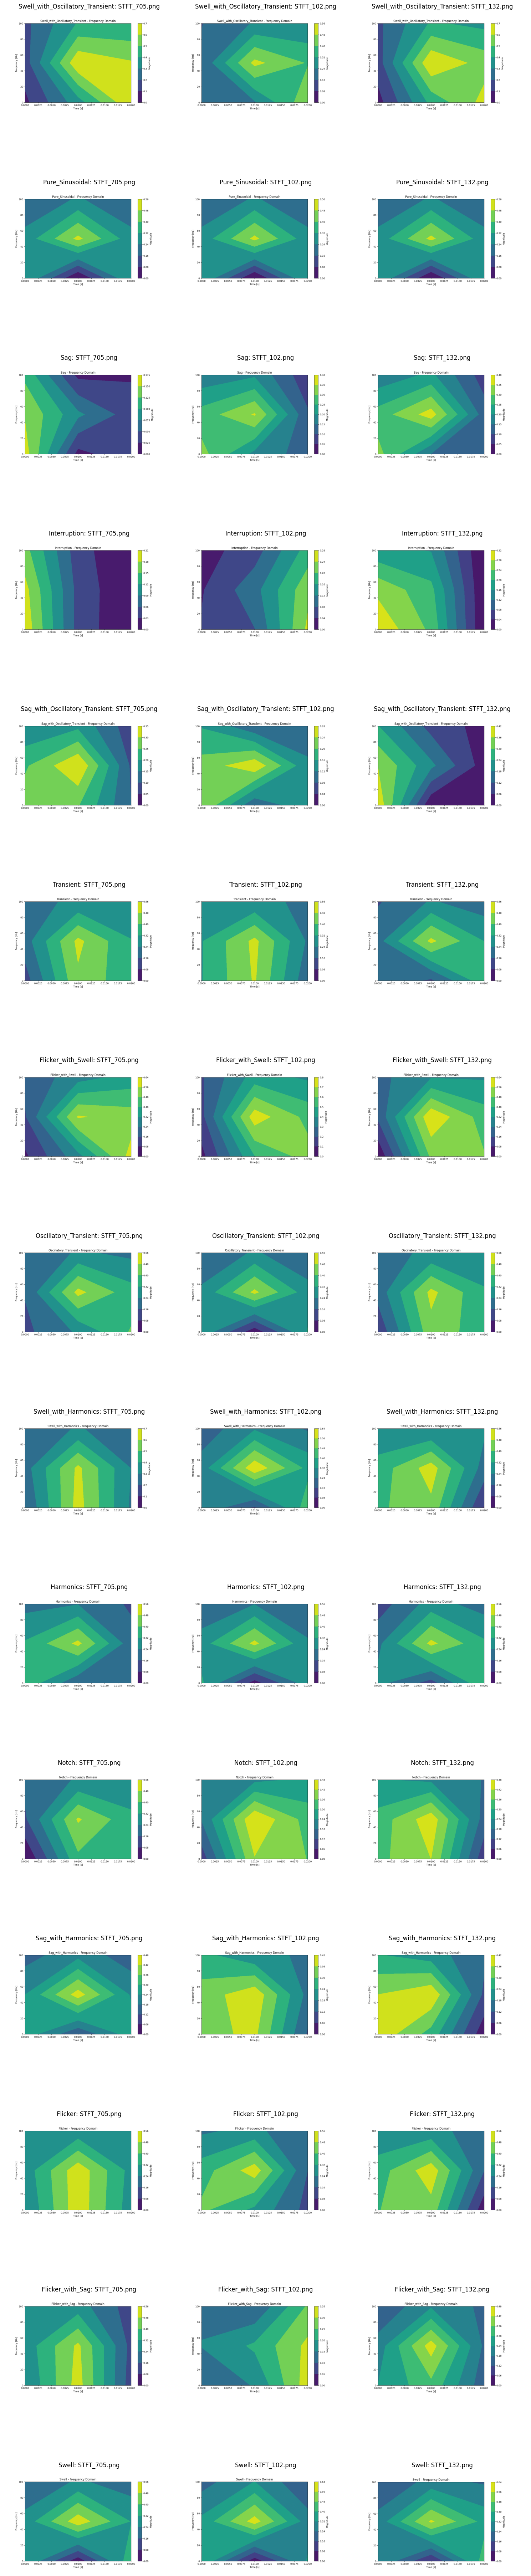

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the base directory
base_dir = '/kaggle/input/'

# Get the disturbance classes
disturbance_classes = os.listdir(base_dir)

# Plot 3 images per class
fig, axes = plt.subplots(len(disturbance_classes), 3, figsize=(15, 5 * len(disturbance_classes)))

for i, disturbance in enumerate(disturbance_classes):
    # Get the folder path and images
    folder_path = os.path.join(base_dir, disturbance)
    images = os.listdir(folder_path)[:3]  # Take the first 3 images

    for j, img_name in enumerate(images):
        # Load the image
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)

        # Plot the image
        ax = axes[i, j] if len(disturbance_classes) > 1 else axes[j]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"{disturbance}: {img_name}")

# Adjust layout
plt.tight_layout()
plt.show()


In [5]:
for disturbance in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, disturbance)
    images = os.listdir(folder_path)

    # Split into train, validation, and test (70%, 10%, 10%)
    train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Copy files to respective directories
    for image in train_images:
        shutil.copy(os.path.join(folder_path, image), os.path.join(output_dir, 'train', disturbance, image))
    for image in val_images:
        shutil.copy(os.path.join(folder_path, image), os.path.join(output_dir, 'valid', disturbance, image))
    for image in test_images:
        shutil.copy(os.path.join(folder_path, image), os.path.join(output_dir, 'test', disturbance, image))


In [6]:
for split in ['train', 'valid', 'test']:
    split_dir = os.path.join(output_dir, split)
    print(f"{split.capitalize()} set:")
    for disturbance in os.listdir(split_dir):
        print(f"  {disturbance}: {len(os.listdir(os.path.join(split_dir, disturbance)))} images")


Train set:
  Swell: 700 images
  Swell_with_Oscillatory_Transient: 700 images
  Swell_with_Harmonics: 700 images
  Notch: 700 images
  Sag_with_Oscillatory_Transient: 700 images
  Flicker_with_Sag: 700 images
  Interruption: 700 images
  Sag_with_Harmonics: 700 images
  Flicker_with_Swell: 700 images
  Oscillatory_Transient: 700 images
  Harmonics: 700 images
  Flicker: 700 images
  Transient: 700 images
  Sag: 700 images
  Pure_Sinusoidal: 700 images
Valid set:
  Swell: 150 images
  Swell_with_Oscillatory_Transient: 150 images
  Swell_with_Harmonics: 150 images
  Notch: 150 images
  Sag_with_Oscillatory_Transient: 150 images
  Flicker_with_Sag: 150 images
  Interruption: 150 images
  Sag_with_Harmonics: 150 images
  Flicker_with_Swell: 150 images
  Oscillatory_Transient: 150 images
  Harmonics: 150 images
  Flicker: 150 images
  Transient: 150 images
  Sag: 150 images
  Pure_Sinusoidal: 150 images
Test set:
  Swell: 150 images
  Swell_with_Oscillatory_Transient: 150 images
  Swell_wit

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    width_shift_range=0.1,  # Reduced width shift
    height_shift_range=0.1,  # Reduced height shift
    zoom_range=0.1,  # Reduced zoom
    
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/train',  # Correct path for training data
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


val_generator = val_datagen.flow_from_directory(
    '/kaggle/working/valid',  # Correct path for validation data
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffling
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/working/test',  # Correct path for test data
    target_size=(128, 128),
    batch_size=32,  class_mode='categorical',
    shuffle=False  # Disable shuffling
)

2025-04-23 11:41:33.318492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745408493.590189      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745408493.670438      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 10500 images belonging to 15 classes.
Found 2250 images belonging to 15 classes.
Found 2250 images belonging to 15 classes.


In [8]:
print(train_generator[0][0].shape)  # Should show (batch_size, 128, 128, channels)

(32, 128, 128, 3)


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks

# 1. Transformer Block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super().__init__(**kwargs)  # <- accept extra keyword arguments
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.att.key_dim,
            "num_heads": self.att.num_heads,
            "ff_dim": self.ffn.layers[0].units,
            "rate": self.dropout1.rate,
        })
        return config


# 2. Positional Encoding
class PositionalEncoding(layers.Layer):
    def __init__(self, max_len, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.max_len = max_len
        self.embed_dim = embed_dim
        
    def build(self, input_shape):
        self.position_embedding = self.add_weight(
            name="position_embedding",
            shape=(self.max_len, self.embed_dim),
            initializer="glorot_normal",
            trainable=True
        )
        
    def call(self, x):
        positions = self.position_embedding[:tf.shape(x)[1], :]
        return x + positions
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "max_len": self.max_len,
            "embed_dim": self.embed_dim,
        })
        return config



# 3. Model Creation
def create_pure_transformer_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)  # (128, 128, 3)
    
    # Initial processing
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Reshape
    x = layers.Reshape((64, 64*32))(x)
    
    # Projection
    embed_dim = 128
    x = layers.Dense(embed_dim)(x)
    
    # Positional encoding
    x = PositionalEncoding(64, embed_dim)(x)
    
    # Transformer blocks
    x = TransformerBlock(embed_dim, num_heads=4, ff_dim=512)(x)
    x = TransformerBlock(embed_dim, num_heads=4, ff_dim=512)(x)
    x = TransformerBlock(embed_dim, num_heads=4, ff_dim=512)(x)
    x = TransformerBlock(embed_dim, num_heads=4, ff_dim=512)(x)
    
    # Classification
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    return models.Model(inputs=inputs, outputs=outputs)

# 4. Model Compilation
input_shape = (128, 128, 3)
num_classes = len(train_generator.class_indices)

model = create_pure_transformer_model(input_shape, num_classes)
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[
        callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(factor=0.2, patience=5)
    ]
)

2025-04-23 11:41:49.665698: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


329/329 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step - accuracy: 0.0965 - loss: 2.9400 - val_accuracy: 0.1942 - val_loss: 2.2748 - learning_rate: 1.0000e-04
Epoch 2/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.2064 - loss: 2.3503 - val_accuracy: 0.3013 - val_loss: 2.0056 - learning_rate: 1.0000e-04
Epoch 3/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.2949 - loss: 2.0382 - val_accuracy: 0.3440 - val_loss: 1.8712 - learning_rate: 1.0000e-04
Epoch 4/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 356s 1s/step - accuracy: 0.3398 - loss: 1.8748 - val_accuracy: 0.2853 - val_loss: 1.8953 - learning_rate: 1.0000e-04
Epoch 5/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.3664 - loss: 1.7568 - val_accuracy: 0.3787 - val_loss: 1.6639 - learning_rate: 1.0000e-04
Epoch 6/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.4018 - loss: 1.6457 - val_accuracy: 0.3644 - val_loss: 1.7247 - learning_rate: 1.0000e-04
Epoch 7/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy

In [10]:
# Save the model
model.save("transformer_cnn_model.h5")  # HDF5 format

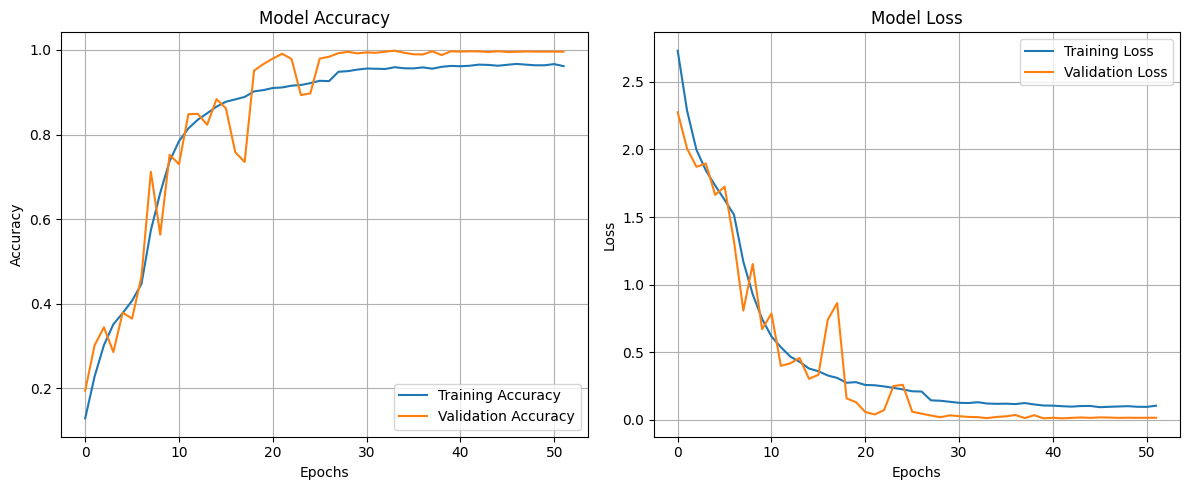

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [12]:
 # Predict on validation data
Y_pred_val = model.predict(val_generator, 
                           steps=int(np.ceil(val_generator.samples / val_generator.batch_size)), 
                           verbose=1)

# Convert predicted probabilities to class indices
y_pred_val = np.argmax(Y_pred_val, axis=1)

# Extract true labels
true_labels = val_generator.classes  # These are the ground truth labels
predicted_labels = y_pred_val  # These are your model's predictions

# Calculate accuracy
from sklearn.metrics import accuracy_score
validation_accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 38s 516ms/step
Validation Accuracy: 0.9969


71/71 ━━━━━━━━━━━━━━━━━━━━ 36s 508ms/step


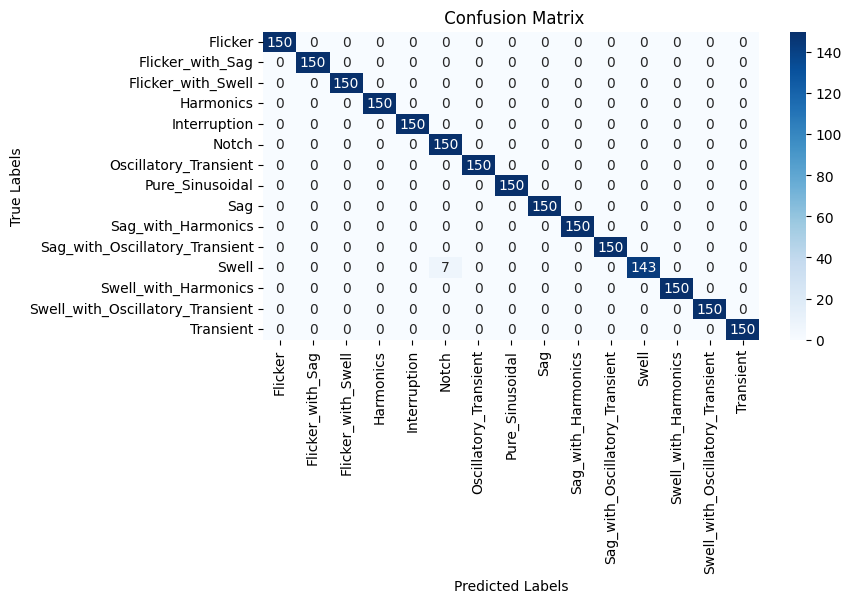


 Classification Report:
                                  precision    recall  f1-score   support

                         Flicker       1.00      1.00      1.00       150
                Flicker_with_Sag       1.00      1.00      1.00       150
              Flicker_with_Swell       1.00      1.00      1.00       150
                       Harmonics       1.00      1.00      1.00       150
                    Interruption       1.00      1.00      1.00       150
                           Notch       0.96      1.00      0.98       150
           Oscillatory_Transient       1.00      1.00      1.00       150
                 Pure_Sinusoidal       1.00      1.00      1.00       150
                             Sag       1.00      1.00      1.00       150
              Sag_with_Harmonics       1.00      1.00      1.00       150
  Sag_with_Oscillatory_Transient       1.00      1.00      1.00       150
                           Swell       1.00      0.95      0.98       150
            

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the validation data
val_predictions = model.predict(val_generator)
val_predicted_labels = np.argmax(val_predictions, axis=1)
val_true_labels = val_generator.classes  # True labels from the validation generator
val_class_names = list(val_generator.class_indices.keys())  # Get class names from the generator

# Compute the confusion matrix for validation data
val_cm = confusion_matrix(val_true_labels, val_predicted_labels)

# Create a heatmap for validation data
plt.figure(figsize=(8, 4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_class_names, yticklabels=val_class_names)
plt.title(' Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report for validation data
print("\n Classification Report:")
print(classification_report(val_true_labels, val_predicted_labels, target_names=val_class_names))


In [14]:
# Predict on test data
Y_pred_test = model.predict(test_generator, 
                            steps=int(np.ceil(test_generator.samples / test_generator.batch_size)), 
                            verbose=1)
y_pred_test = np.argmax(Y_pred_test, axis=1)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 36s 509ms/step


In [15]:
from sklearn.metrics import accuracy_score

# Assuming y_true are the true class labels for your validation/test set
accuracy = accuracy_score(test_generator.classes,y_pred_test)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9973333333333333


In [16]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the test dataset
test_dir = '/kaggle/working/test'

# Collect all image paths
all_image_paths = [os.path.join(root, file)
                   for root, _, files in os.walk(test_dir)
                   for file in files if file.endswith(('jpg', 'png', 'jpeg'))]

# Select 10 random images
random_image_paths = random.sample(all_image_paths, min(10, len(all_image_paths)))

# Get class labels from test generator
class_labels = list(test_generator.class_indices.keys())

# Test and print results for 10 random images
for i, img_path in enumerate(random_image_paths, 1):
    true_label = os.path.basename(os.path.dirname(img_path))
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)  # Normalize and add batch dim
    predicted_class = class_labels[np.argmax(model.predict(img_array))]
    print(f"Image {i}: True Label: {true_label}, Predicted Label: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step
Image 1: True Label: Sag_with_Harmonics, Predicted Label: Sag_with_Harmonics
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image 2: True Label: Flicker_with_Sag, Predicted Label: Flicker_with_Sag
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image 3: True Label: Sag_with_Oscillatory_Transient, Predicted Label: Sag_with_Oscillatory_Transient
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image 4: True Label: Sag_with_Oscillatory_Transient, Predicted Label: Sag_with_Oscillatory_Transient
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image 5: True Label: Pure_Sinusoidal, Predicted Label: Pure_Sinusoidal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image 6: True Label: Swell_with_Harmonics, Predicted Label: Swell_with_Harmonics
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image 7: True Label: Pure_Sinusoidal, Predicted Label: Pure_Sinusoidal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image 8: True Label: Flicker_with_Sag, Predicted Label: Flicker_with_Sag
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image 9: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


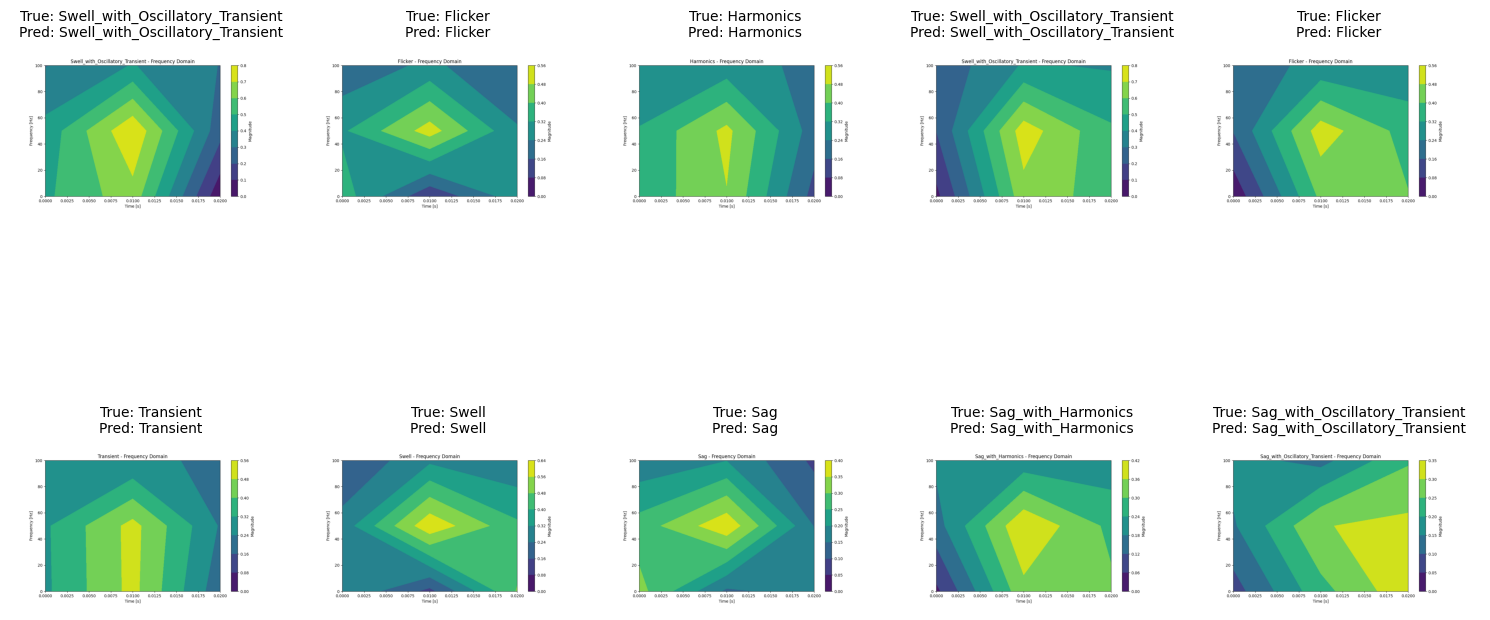

In [17]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the test dataset
test_dir = '/kaggle/working/test'

# Collect all image paths
all_image_paths = [os.path.join(root, file)
                   for root, _, files in os.walk(test_dir)
                   for file in files if file.endswith(('jpg', 'png', 'jpeg'))]

# Select 10 random images
random_image_paths = random.sample(all_image_paths, min(10, len(all_image_paths)))

# Get class labels from test generator
class_labels = list(test_generator.class_indices.keys())

# Plot images with true and predicted labels
plt.figure(figsize=(15, 10))

for i, img_path in enumerate(random_image_paths, 1):
    true_label = os.path.basename(os.path.dirname(img_path))
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)  # Normalize and add batch dim
    predicted_class = class_labels[np.argmax(model.predict(img_array))]
    
    # Plot image
    plt.subplot(2, 5, i)
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {predicted_class}", fontsize=10)

plt.tight_layout()
plt.show()


71/71 ━━━━━━━━━━━━━━━━━━━━ 36s 506ms/step


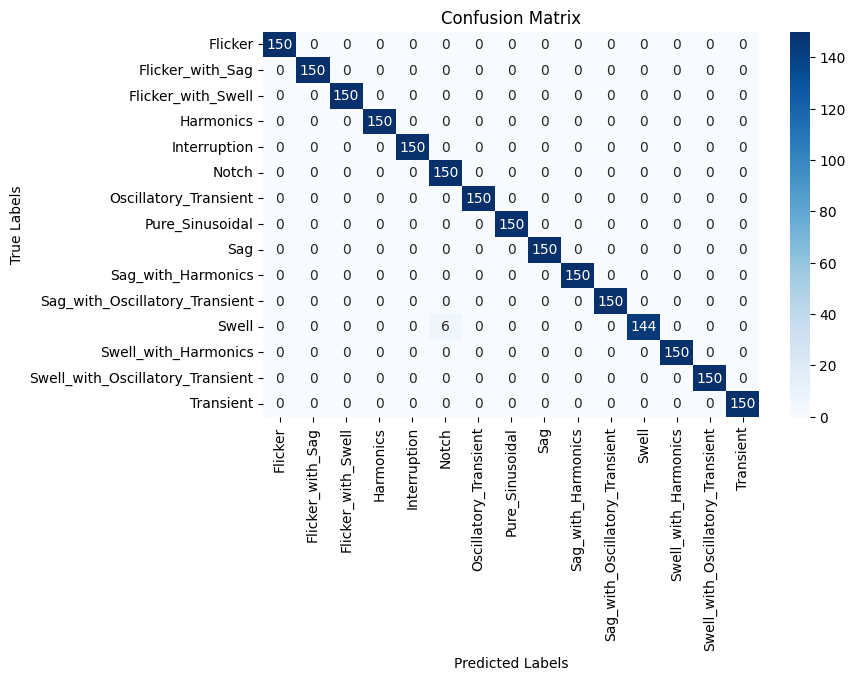


Classification Report:
                                  precision    recall  f1-score   support

                         Flicker       1.00      1.00      1.00       150
                Flicker_with_Sag       1.00      1.00      1.00       150
              Flicker_with_Swell       1.00      1.00      1.00       150
                       Harmonics       1.00      1.00      1.00       150
                    Interruption       1.00      1.00      1.00       150
                           Notch       0.96      1.00      0.98       150
           Oscillatory_Transient       1.00      1.00      1.00       150
                 Pure_Sinusoidal       1.00      1.00      1.00       150
                             Sag       1.00      1.00      1.00       150
              Sag_with_Harmonics       1.00      1.00      1.00       150
  Sag_with_Oscillatory_Transient       1.00      1.00      1.00       150
                           Swell       1.00      0.96      0.98       150
            S

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test data
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes  # True labels from the test generator
class_names = list(test_generator.class_indices.keys())  # Get class names from the generator

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))


In [19]:
# Load the model
loaded_model = tf.keras.models.load_model("transformer_cnn_model.h5", 
                                          custom_objects={
                                              'TransformerBlock': TransformerBlock,
                                              'PositionalEncoding': PositionalEncoding
                                          })